In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
GRE Scores (out of 340): This refers to the scores obtained by a student in the Graduate Record Examination (GRE),
which is a standardized test commonly used for admission into graduate programs. The scores range from 0 to 340,
with higher scores indicating better performance.

TOEFL Scores (out of 120): This refers to the scores obtained by a student in the Test of English 
as a Foreign Language (TOEFL), which measures English language proficiency for non-native English speakers.
The scores range from 0 to 120, with higher scores indicating better English language skills.

University Rating (out of 5): This represents the rating or reputation of the university or institution 
from which the student graduated or is applying to. It is usually based on various factors such as 
research output, faculty quality, infrastructure, and academic performance. 
The rating ranges from 1 to 5, with higher values indicating higher ratings or better universities.

Statement of Purpose(SOP)and Letter of Recommendation Strength(LOR) (out of 5): This refers to the perceived strength or 
quality of the student's statement of purpose and letter of recommendation. 
It is usually assessed by the admissions committee or reviewers based on the content, clarity, 
coherence, and strength of recommendations. The scores range from 1 to 5, 
ith higher values indicating stronger statements and recommendations.

Undergraduate GPA (out of 10): This represents the Grade Point Average (GPA) achieved by the student during their
undergraduate studies. The GPA is a numerical representationof a student's academic performance, typically ranging from 0 to 10.
Higher values indicate higher GPAs, reflecting better academic achievement.

Research Experience (either 0 or 1): This indicates whether the student has prior research experience or not.
It is represented as a binary variable, where 0 typically means no research experience and 1 means the student has
research experience.

Chance of Admit (ranging from 0 to 1): chance of admit is a parameter that was asked to individuals 
(some values manually entered) before the results of the application. Think of it this way, with
all the scores and other documents you have, you are interested in feeding the data to a ML model and see 
what it predicts. Basically, you are allowing it to make a prediction regarding your chance of admit so that 
you can understand what your own chances are. I do understand that eventually it is entirely your decision whether
you choose to apply to a particular university or not, however this dataset was only created to be
fed into different ML models and check how well it can understand the importance of different parameters
before making a prediction.

SyntaxError: unterminated string literal (detected at line 15) (1319648438.py, line 15)

In [2]:
data=pd.read_csv('admission_data.csv')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Null values

In [4]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Rename the columns name

In [5]:
data.rename(columns=lambda x: x.strip(), inplace=True)


In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame
data.rename(columns={
    'GRE Score': 'GRE_Score',
    'TOEFL Score': 'TOEFL_Score',
    'University Rating': 'University_Rating',
    'Chance of Admit': 'Chance_of_Admit'
}, inplace=True)

# The columns in the DataFrame 'df' are renamed in place


In [7]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
data.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

# Watching out is there any duplicates rows on data 

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame
duplicates = data[data.duplicated(keep=False)]
duplicates


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


# Treating outliers if it is there

In [10]:
data.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.GRE_Score.quantile(0.75)
q1 = data.GRE_Score.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(350.5, 282.5)

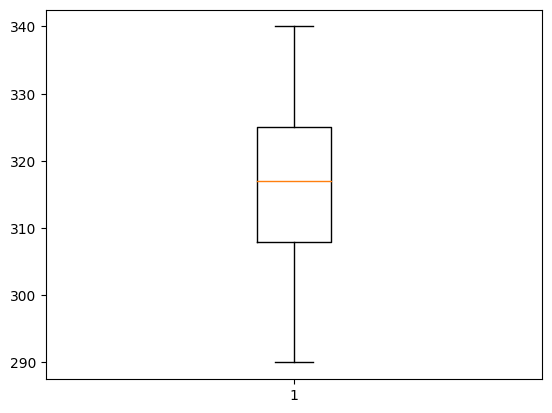

In [12]:
# Creating plot
plt.boxplot(data['GRE_Score'])
 
# show plot
plt.show()

In [13]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.TOEFL_Score.quantile(0.75)
q1 = data.TOEFL_Score.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(125.5, 89.5)

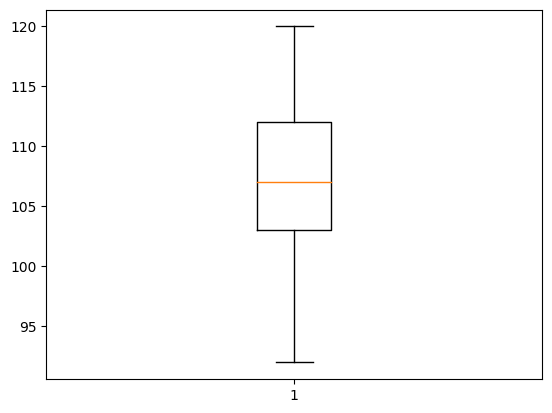

In [14]:
# Creating plot
plt.boxplot(data['TOEFL_Score'])
 
# show plot
plt.show()

In [15]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.University_Rating.quantile(0.75)
q1 = data.University_Rating.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(7.0, -1.0)

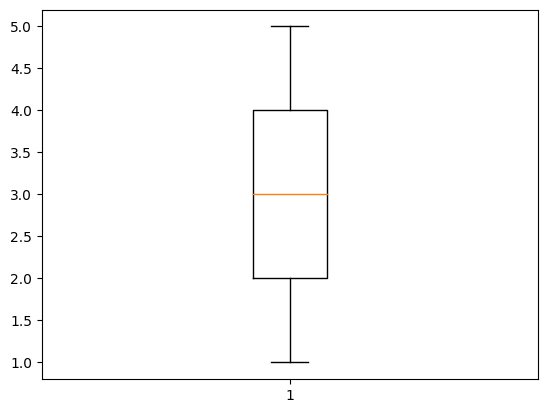

In [16]:
# Creating plot
plt.boxplot(data['University_Rating'])
 
# show plot
plt.show()

In [17]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.SOP.quantile(0.75)
q1 = data.SOP.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(6.25, 0.25)

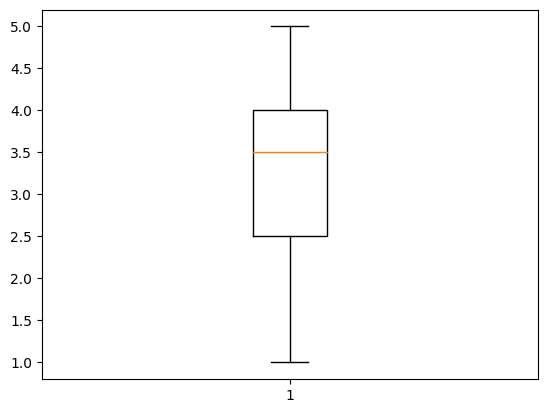

In [18]:
# Creating plot
plt.boxplot(data['SOP'])
 
# show plot
plt.show()

In [19]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.LOR.quantile(0.75)
q1 = data.LOR.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(5.5, 1.5)

In [20]:
data['LOR'] = data['LOR'].clip(upper_tres,lower_tres)

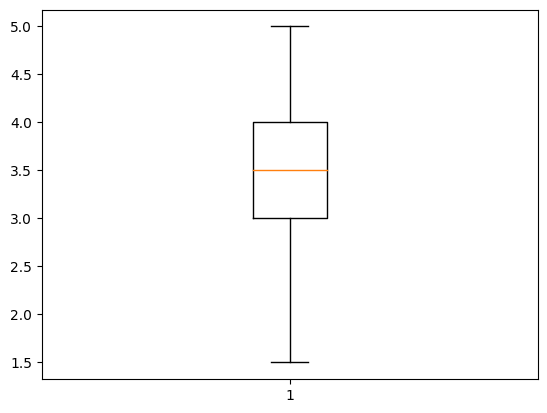

In [21]:
# Creating plot
plt.boxplot(data['LOR'])
 
# show plot
plt.show()

In [22]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.CGPA.quantile(0.75)
q1 = data.CGPA.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(10.408749999999996, 6.7587500000000045)

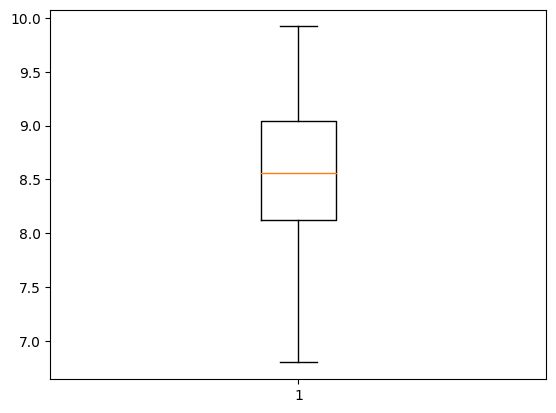

In [23]:
# Creating plot
plt.boxplot(data['CGPA'])
 
# show plot
plt.show()

In [24]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Research.quantile(0.75)
q1 = data.Research.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(2.5, -1.5)

In [25]:
data['Research'] = data['Research'].clip(upper_tres,lower_tres)

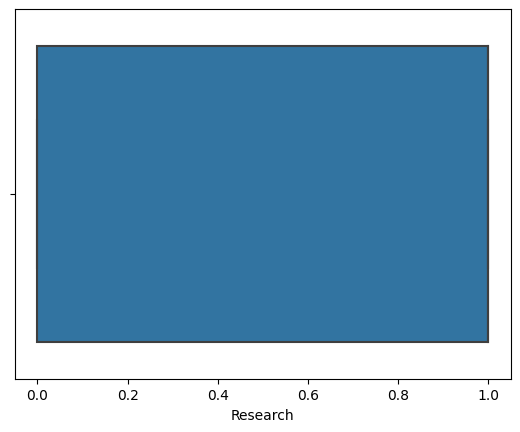

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'datas' with your data
sns.boxplot(x='Research', data=data)

# Show the plot
plt.show()


In [27]:
# data['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = data.Chance_of_Admit.quantile(0.75)
q1 = data.Chance_of_Admit.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1.105, 0.3450000000000001)

In [28]:
data['Chance_of_Admit'] = data['Chance_of_Admit'].clip(upper_tres,lower_tres)

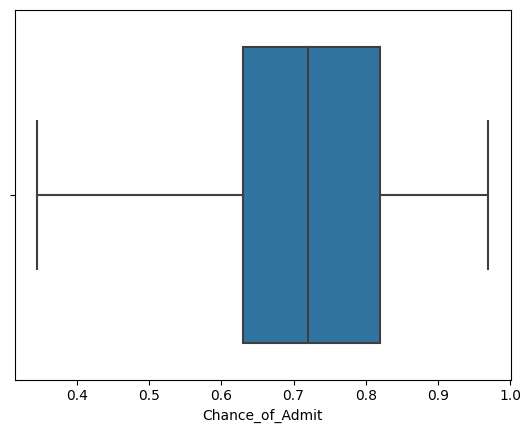

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'datas' with your data
sns.boxplot(x='Chance_of_Admit', data=data)

# Show the plot
plt.show()


# skewness 

<Figure size 800x600 with 0 Axes>

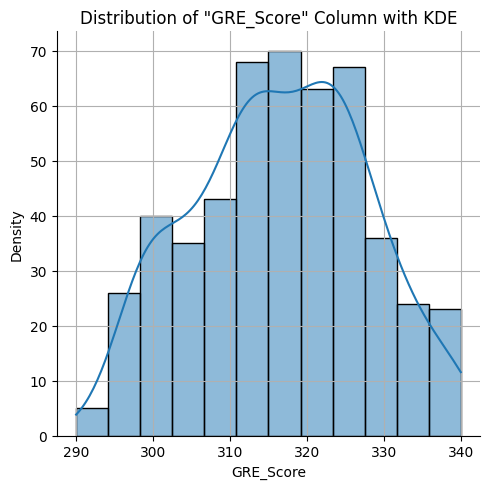

In [30]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['GRE_Score'], kde=True)
plt.xlabel('GRE_Score')
plt.ylabel('Density')
plt.title('Distribution of "GRE_Score" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

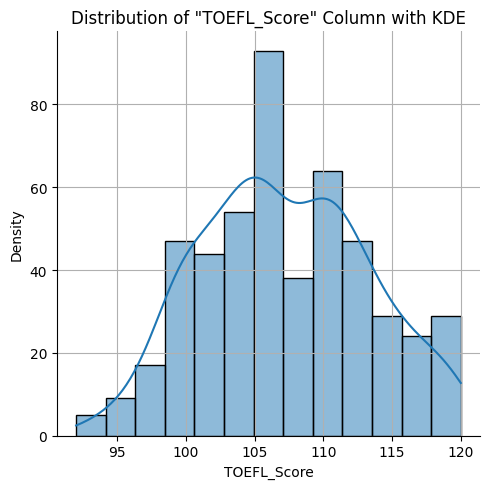

In [31]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['TOEFL_Score'], kde=True)
plt.xlabel('TOEFL_Score')
plt.ylabel('Density')
plt.title('Distribution of "TOEFL_Score" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
data['TOEFL_Score'].skew()

0.09560097235726285

<Figure size 800x600 with 0 Axes>

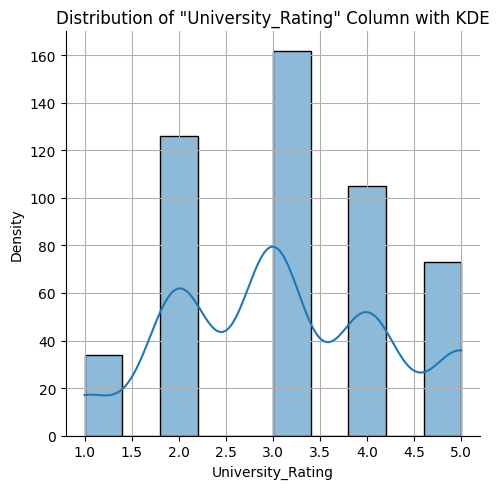

In [33]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['University_Rating'], kde=True)
plt.xlabel('University_Rating')
plt.ylabel('Density')
plt.title('Distribution of "University_Rating" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
data['University_Rating'].skew()

0.09029498312712977

<Figure size 800x600 with 0 Axes>

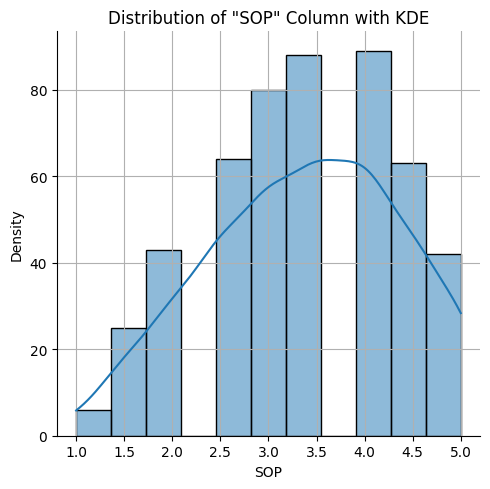

In [35]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['SOP'], kde=True)
plt.xlabel('SOP')
plt.ylabel('Density')
plt.title('Distribution of "SOP" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
data['SOP'].skew()

-0.22897239628779945

<Figure size 800x600 with 0 Axes>

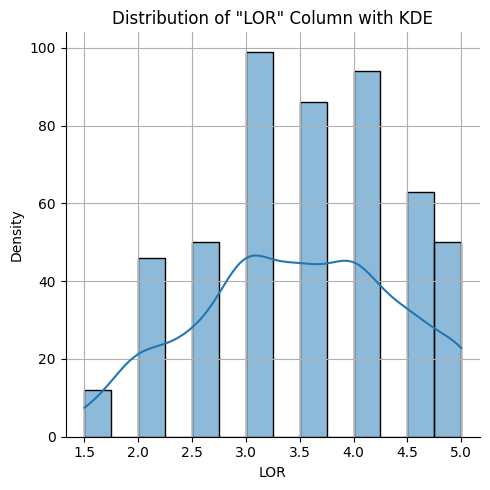

In [37]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['LOR'], kde=True)
plt.xlabel('LOR')
plt.ylabel('Density')
plt.title('Distribution of "LOR" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
data['LOR'].skew()

-0.13046677390779557

<Figure size 800x600 with 0 Axes>

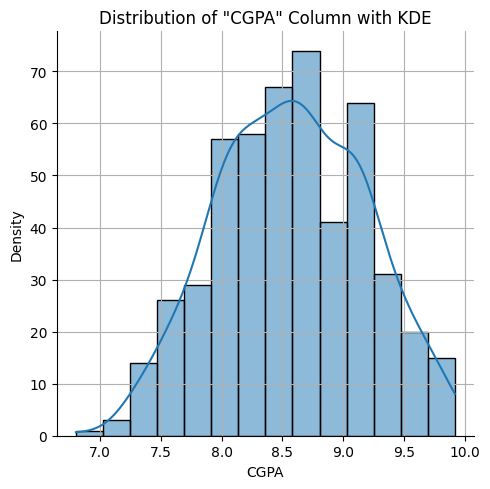

In [39]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['CGPA'], kde=True)
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.title('Distribution of "CGPA" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

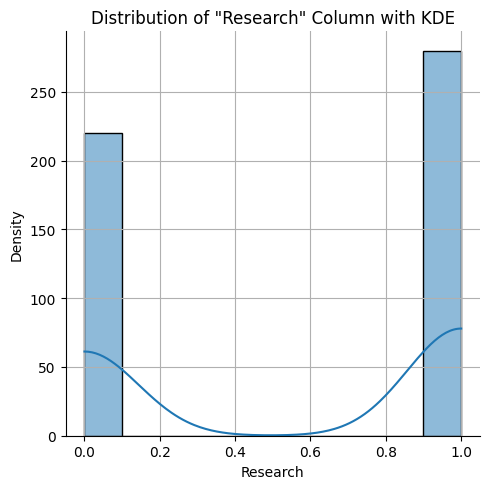

In [40]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Research'], kde=True)
plt.xlabel('Research')
plt.ylabel('Density')
plt.title('Distribution of "Research" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
data['Research'].skew()

-0.24247492100796933

<Figure size 800x600 with 0 Axes>

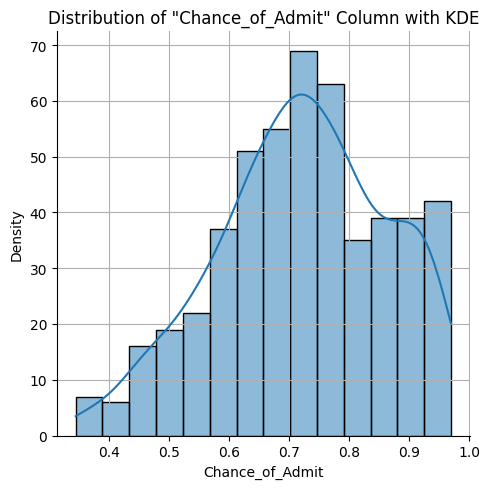

In [42]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data['Chance_of_Admit'], kde=True)
plt.xlabel('Chance_of_Admit')
plt.ylabel('Density')
plt.title('Distribution of "Chance_of_Admit" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
data['Chance_of_Admit'].skew()

-0.2876341075777284

# EDA

In [44]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [45]:
# Shape of the Distribution:

    Symmetric Distribution: If the histogram is roughly symmetrical, it suggests that data points are
    evenly distributed on both sides of the mean.
    Skewed Distribution: If the histogram has a longer tail on one side, it indicates skewness.
    A longer tail on the right (positive values) suggests positive skew, while a longer tail on the left (negative values) suggests negative skew.
Central Tendency:

    The peak of the histogram represents the mode, which is the most common value in the dataset. 
    The mode corresponds to the central tendency of the data.
    The mean and median can also be estimated from the histogram, especially in a symmetric distribution where they coincide.
Spread and Dispersion:
    The width of the distribution indicates the degree of variability in the data. 
    A wider distribution suggests higher variability.
    The standard deviation can be estimated based on the spread of the histogram.
Outliers:

    Outliers are data points that significantly deviate from the majority of the data. 
    In a histogram, they appear as individual bars that are far from the main distribution.
Multi-Modality:
    Multiple peaks in the histogram suggest that the data may have more than one underlying distribution or modes.
Data Clusters:
    In a histogram with multiple modes or clusters, each cluster can represent a different subset or category within the data.
Data Skewness:
    Skewness can be visually assessed by observing the direction of the longer tail.
    Positive skew means the tail extends to the right, while negative skew means the tail extends to the left.
Data Ranges:
    You can determine the range of values by looking at the spread of the histogram. 
    It shows the minimum and maximum values in the dataset.
Data Gaps:
    Gaps in the histogram may indicate specific ranges of values that are not present in the data.
Data Distribution Type:
    The shape of the histogram can provide clues about the underlying distribution type, such as normal (bell-shaped), 
    uniform, bimodal, or exponential.


IndentationError: unexpected indent (2876821048.py, line 3)

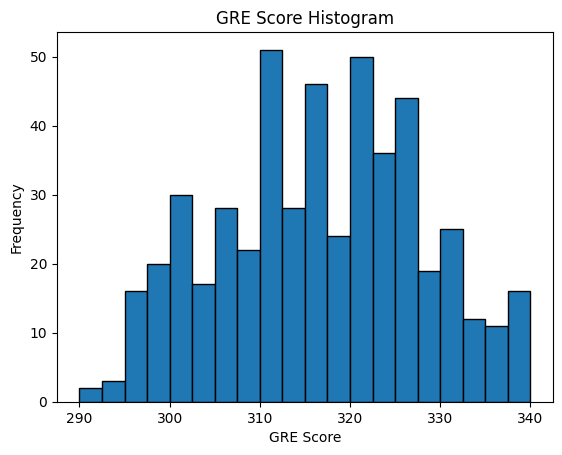

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['GRE_Score'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('GRE Score Histogram')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()


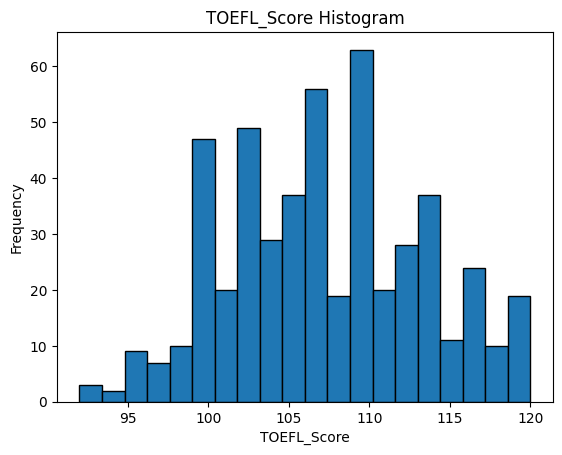

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['TOEFL_Score'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('TOEFL_Score Histogram')
plt.xlabel('TOEFL_Score')
plt.ylabel('Frequency')
plt.show()


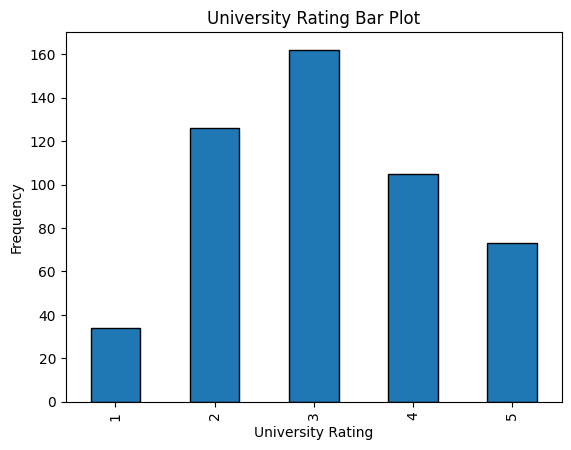

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['University_Rating'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('University Rating Bar Plot')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.show()


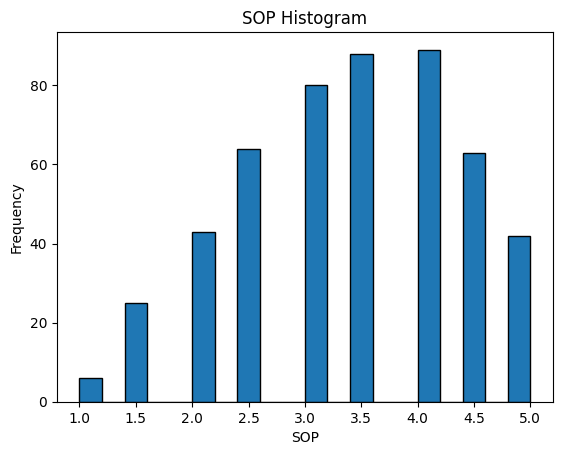

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['SOP'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('SOP Histogram')
plt.xlabel('SOP')
plt.ylabel('Frequency')
plt.show()


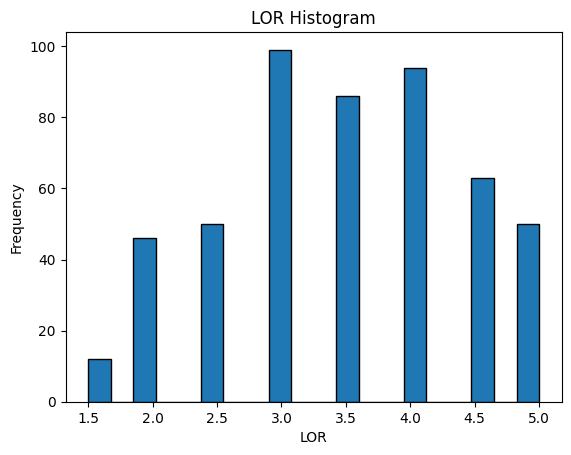

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['LOR'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('LOR Histogram')
plt.xlabel('LOR')
plt.ylabel('Frequency')
plt.show()


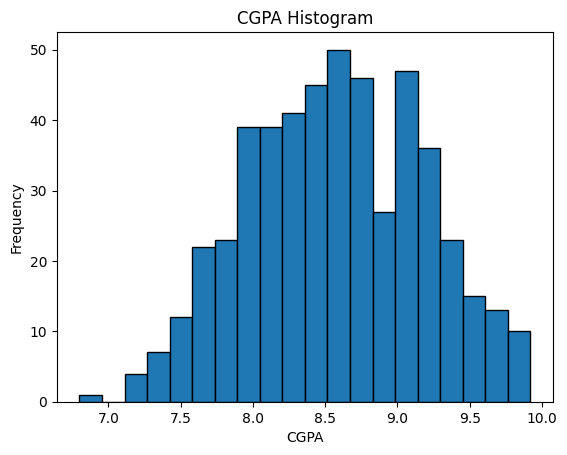

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['CGPA'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('CGPA Histogram')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


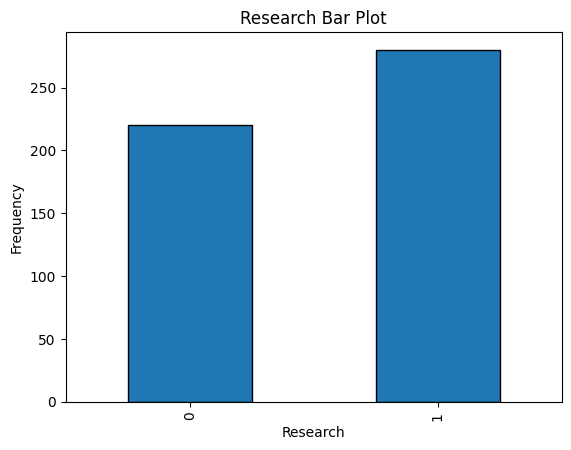

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Research'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Research Bar Plot')
plt.xlabel('Research')
plt.ylabel('Frequency')
plt.show()


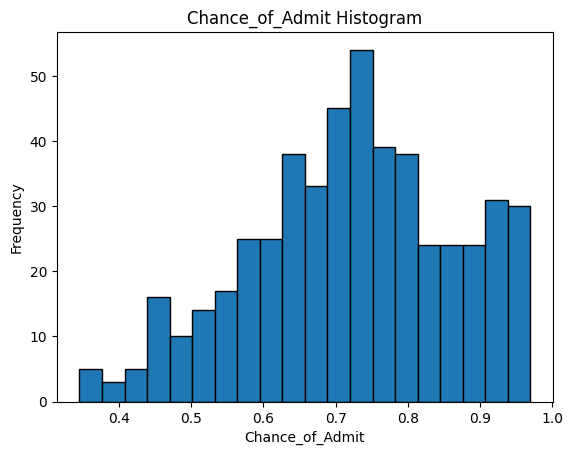

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
data['Chance_of_Admit'].plot(kind='hist', bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.title('Chance_of_Admit Histogram')
plt.xlabel('Chance_of_Admit')
plt.ylabel('Frequency')
plt.show()


# comparing features with target variable

In [54]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


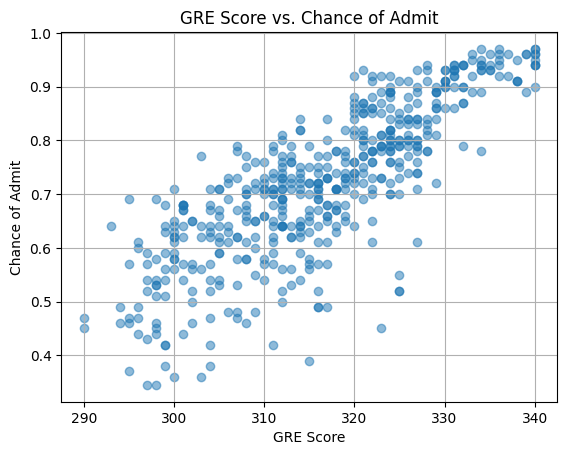

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Access columns directly to create the scatter plot
plt.scatter(data['GRE_Score'], data['Chance_of_Admit'], alpha=0.5)  # 'alpha' adjusts point transparency
plt.title("GRE Score vs. Chance of Admit")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


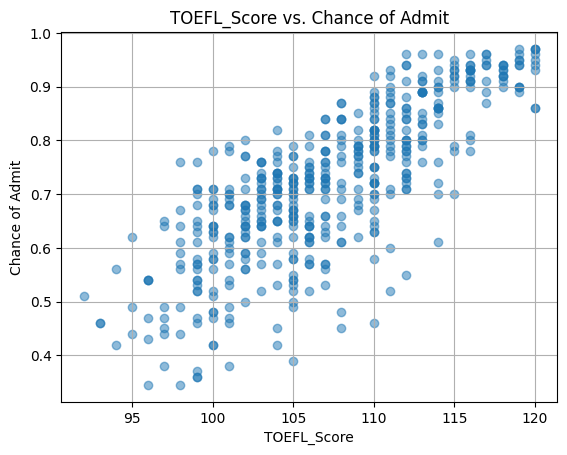

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Access columns directly to create the scatter plot
plt.scatter(data['TOEFL_Score'], data['Chance_of_Admit'], alpha=0.5)  # 'alpha' adjusts point transparency
plt.title("TOEFL_Score vs. Chance of Admit")
plt.xlabel("TOEFL_Score")
plt.ylabel("Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


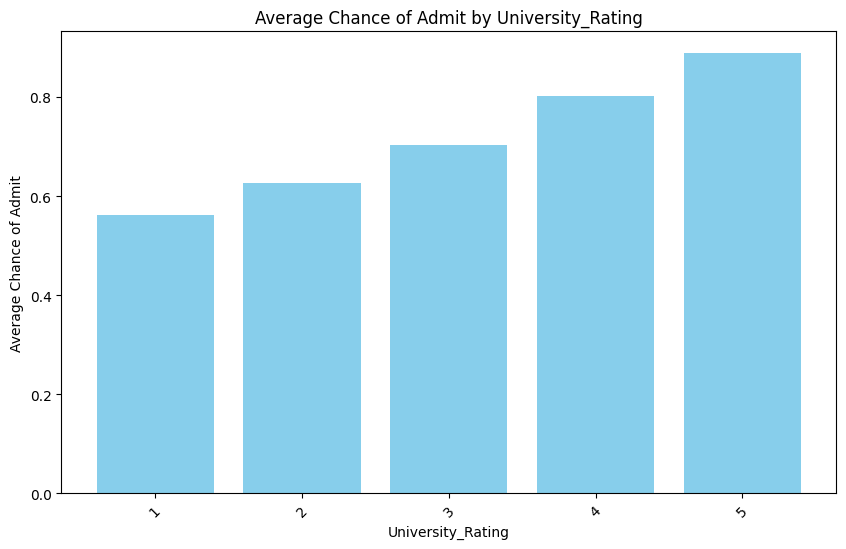

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('University_Rating')['Chance_of_Admit'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['University_Rating'], grouped_data['Chance_of_Admit'], color='skyblue')
plt.title("Average Chance of Admit by University_Rating")
plt.xlabel("University_Rating")
plt.ylabel("Average Chance of Admit")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


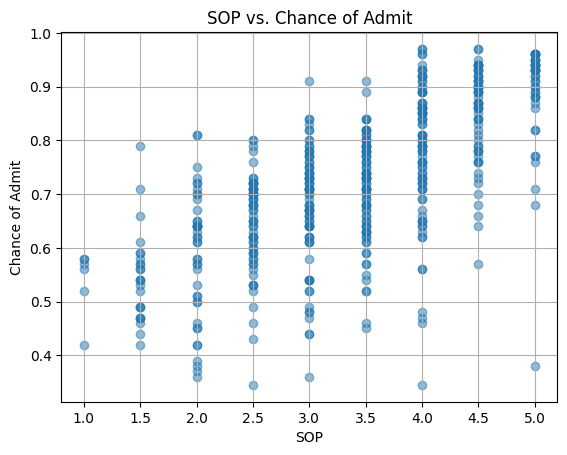

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
plt.scatter(data['SOP'], data['Chance_of_Admit'], alpha=0.5)
plt.title("SOP vs. Chance of Admit")
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


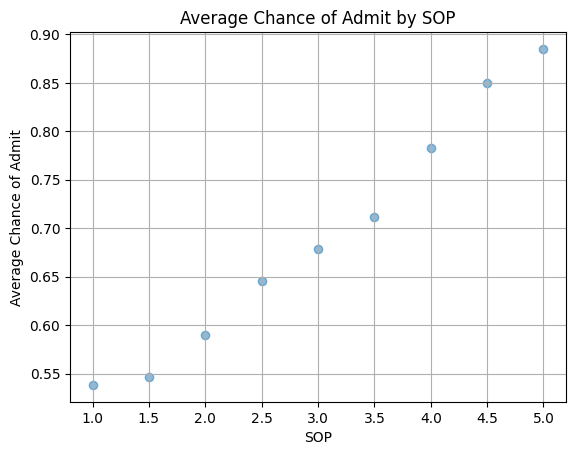

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame

# Group the data by 'SOP' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('SOP')['Chance_of_Admit'].mean().reset_index()

# Create the scatter plot
plt.scatter(grouped_data['SOP'], grouped_data['Chance_of_Admit'], alpha=0.5)
plt.title("Average Chance of Admit by SOP")
plt.xlabel("SOP")
plt.ylabel("Average Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


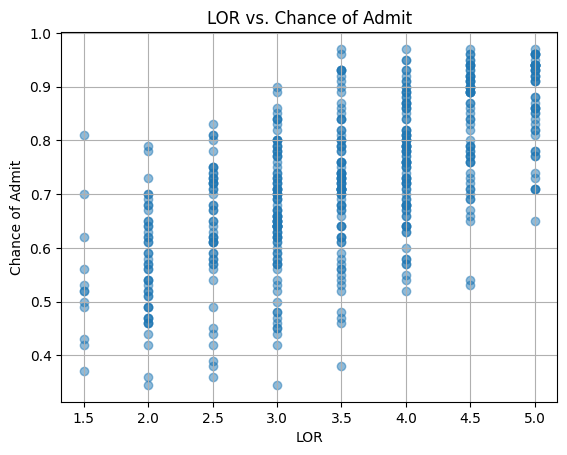

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
plt.scatter(data['LOR'], data['Chance_of_Admit'], alpha=0.5)
plt.title("LOR vs. Chance of Admit")
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


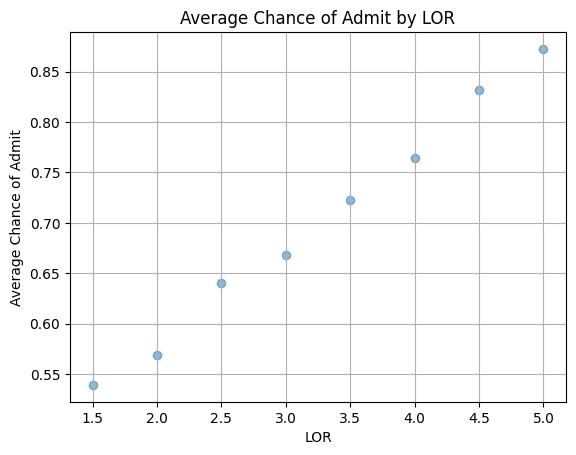

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame

# Group the data by 'SOP' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('LOR')['Chance_of_Admit'].mean().reset_index()

# Create the scatter plot
plt.scatter(grouped_data['LOR'], grouped_data['Chance_of_Admit'], alpha=0.5)
plt.title("Average Chance of Admit by LOR")
plt.xlabel("LOR")
plt.ylabel("Average Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


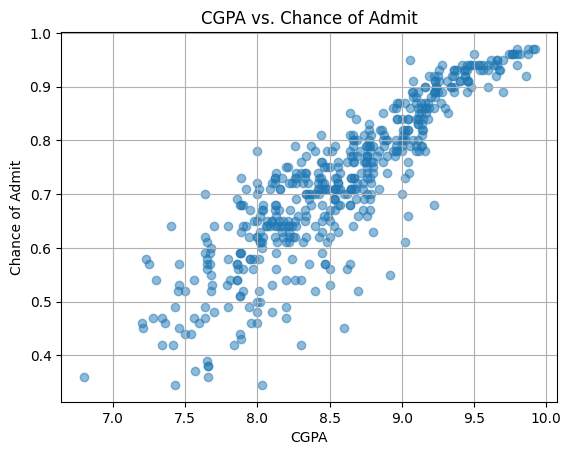

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Access columns directly to create the scatter plot
plt.scatter(data['CGPA'], data['Chance_of_Admit'], alpha=0.5)  # 'alpha' adjusts point transparency
plt.title("CGPA vs. Chance of Admit")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.grid(True)

# Show the plot (if using a Jupyter Notebook)
plt.show()


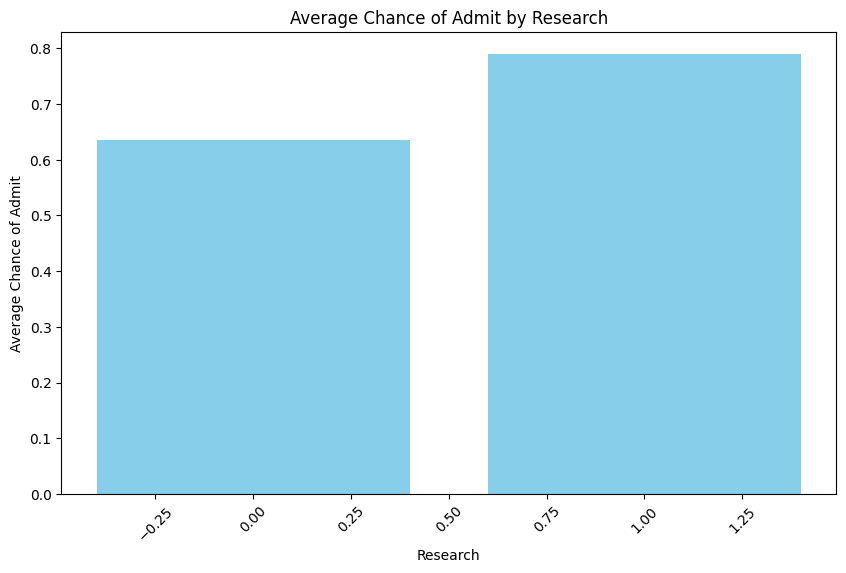

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a pandas DataFrame
# Group the data by 'University_Ranking' and calculate the mean 'Chance_of_Admit'
grouped_data = data.groupby('Research')['Chance_of_Admit'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(grouped_data['Research'], grouped_data['Chance_of_Admit'], color='skyblue')
plt.title("Average Chance of Admit by Research")
plt.xlabel("Research")
plt.ylabel("Average Chance of Admit")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot (if using a Jupyter Notebook)
plt.show()


In [64]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# MODEL

In [ ]:
i am using various model and do cross validation for that and see the auc roc value based on this value which model has high auc roc 
value atlast i chooose that model for predicition

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
# Splitting the Data
X = data.drop('Chance_of_Admit', axis=1)
y = data['Chance_of_Admit']

In [67]:
# Convert continuous target variable to discrete classes threshold
y_class = (y > 0.5).astype(int)

In [68]:
# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [69]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


max_depth=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_Classifie=RandomForestClassifier(max_depth=d, random_state=0)
  rf_Classifie.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_Classifie,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_Classifie,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.9249762583095917
Depth :  2 cross_val_score :  0.9399810066476734
Depth :  3 cross_val_score :  0.9348528015194684
Depth :  4 cross_val_score :  0.9373219373219375
Depth :  5 cross_val_score :  0.93988603988604
Depth :  6 cross_val_score :  0.9449192782526118
Depth :  7 cross_val_score :  0.9399810066476735
Depth :  8 cross_val_score :  0.9424501424501426
Depth :  9 cross_val_score :  0.9424501424501426
Depth :  10 cross_val_score :  0.93988603988604
Depth :  11 cross_val_score :  0.9424501424501426
Depth :  12 cross_val_score :  0.9424501424501426
Depth :  13 cross_val_score :  0.9424501424501426
Depth :  15 cross_val_score :  0.9424501424501426
Depth :  18 cross_val_score :  0.9424501424501426
Depth :  20 cross_val_score :  0.9424501424501426


In [77]:
cross_val_rf_classifie=max(cross_val_rf)
cross_val_rf_classifie

0.9449192782526118

In [78]:
# Model Training
model = RandomForestClassifier(max_depth=6,random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [79]:
cross_val_rf_Classifie=cross_val_score(rf_Classifie,X_train,y_train,cv=15).mean()
cross_val_rf_Classifie

0.9424501424501426

In [80]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC
# Assuming you have a binary classification problem
# You may need to modify this for multiclass classification
y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("Classification Report:\n", report)


Accuracy: 0.94
AUC: 0.894993894993895
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.95      0.99      0.97        91

    accuracy                           0.94       100
   macro avg       0.87      0.72      0.77       100
weighted avg       0.93      0.94      0.93       100



In [103]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Create and train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)
print(y_pred)

# Calculate accuracy, generate a classification report, and calculate AUC-ROC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("AUC-ROC Score:", roc_auc)
print("Classification Report:")
print(report)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
Accuracy: 0.92
AUC-ROC Score: 0.910866910866911
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.92      1.00      0.96        91

    accuracy                           0.92       100
   macro avg       0.96      0.56      0.58       100
weighted avg       0.93      0.92      0.89       100



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Perform cross-validation and obtain both accuracy and AUC-ROC scores
k = 5  # Number of folds
y_scores = cross_val_predict(classifier, X, y_class, cv=k, method='predict_proba')

# Calculate accuracy scores
accuracy_scores = cross_val_score(classifier, X, y_class, cv=k, scoring='accuracy')

# Calculate AUC-ROC scores
roc_auc_scores = []

for i in range(k):
    y_true_fold = y_class[i::k]  # Get true labels for the fold
    y_scores_fold = y_scores[i::k, 1]  # Get predicted probabilities for class 1
    roc_auc = roc_auc_score(y_true_fold, y_scores_fold)
    roc_auc_scores.append(roc_auc)

# Print cross-validation accuracy and AUC-ROC scores
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))
print("Cross-Validation AUC-ROC Scores:", roc_auc_scores)
print("Mean AUC-ROC Score:", np.mean(roc_auc_scores))


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-Validation Accuracy Scores: [0.91 0.93 0.91 0.91 0.89]
Mean Accuracy: 0.9099999999999999
Standard Deviation of Accuracy: 0.012649110640673528
Cross-Validation AUC-ROC Scores: [0.82642089093702, 0.7772657450076805, 0.873641304347826, 0.9320652173913043, 0.9047619047619048]
Mean AUC-ROC Score: 0.8628310124891472


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [95]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset and split it into features (X) and the target (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier (you can specify the number of neighbors with the 'n_neighbors' parameter)
knnclassifier= KNeighborsClassifier(n_neighbors=3)  # You can choose a different number
knnclassifier.fit(X_train, y_train)

# Make predictions
y_pred = knnclassifier.predict(X_test)

# Calculate accuracy, generate a classification report, and calculate AUC-ROC score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the decision function values for positive class (class 1)
y_score = knnclassifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_score)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("AUC-ROC Score:", roc_auc)
print("Classification Report:")
print(report)


Accuracy: 0.94
AUC-ROC Score: 0.688034188034188
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.95      0.99      0.97        91

    accuracy                           0.94       100
   macro avg       0.87      0.72      0.77       100
weighted avg       0.93      0.94      0.93       100



In [107]:
k = 5  # Number of folds
scores = cross_val_score(knnclassifier, X, y_class, cv=k, scoring='accuracy')
roc_auc_scores = cross_val_score(classifier, X, y_class, cv=k, scoring='roc_auc')

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [108]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))
print("AUC-ROC Scores:", roc_auc_scores)
print("Mean AUC-ROC Score:", np.mean(roc_auc_scores))

Cross-Validation Scores: [0.93 0.92 0.92 0.93 0.93]
Mean Accuracy: 0.9259999999999999
Standard Deviation of Accuracy: 0.004898979485566361
AUC-ROC Scores: [0.83256528 0.94021739 0.80298913 0.96467391 0.85054348]
Mean AUC-ROC Score: 0.878197839444333


In [99]:
# Import necessary libraries

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset and split it into features (X) and the target (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost classifier
xgclassifier = XGBClassifier()
xgclassifier.fit(X_train, y_train)

# Make predictions
y_pred = xgclassifier.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)

# Calculate the predicted probabilities for the positive class
y_prob = xgclassifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)

report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("AUC-ROC Score:", roc_auc)
print("Classification Report:")
print(report)


Accuracy: 0.92
AUC-ROC Score: 0.8595848595848595
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.95      0.97      0.96        91

    accuracy                           0.92       100
   macro avg       0.76      0.71      0.73       100
weighted avg       0.91      0.92      0.92       100



In [113]:
k = 5  # Number of folds
scores = cross_val_score(xgclassifier, X, y_class, cv=k, scoring='accuracy')
roc_auc_scores = cross_val_score(xgclassifier, X, y_class, cv=k, scoring='roc_auc')


In [114]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))
print("Cross-Validation AUC-ROC Scores:", roc_auc_scores)
print("Mean AUC-ROC Score:", np.mean(roc_auc_scores))

Cross-Validation Scores: [0.93 0.92 0.93 0.94 0.91]
Mean Accuracy: 0.9259999999999999
Standard Deviation of Accuracy: 0.010198039027185548
Cross-Validation AUC-ROC Scores: [0.8187404  0.7798913  0.92798913 0.9361413  0.88994565]
Mean AUC-ROC Score: 0.8705415581379817


In [75]:
# Prediction on New Data
new_data = pd.DataFrame({
    'GRE_Score': [250],
    'TOEFL_Score': [80],
    'University_Rating': [2],
    'SOP': [2],
    'LOR': [5],
    'CGPA': [7],
    'Research': [1]
})
chance_of_admit = model.predict(new_data)
print("Chance_of_Admit:", chance_of_admit)

Chance_of_Admit: [0]
